<br>
<img src="https://sites.google.com/a/chesterqualls.com/chester-qualls-is-it/ChesterQualls%20Logo%28small%29.png?revision=2">
<br>
***
# A Mind - Enroll Data Code Book and Observations

> * This look at the data is based on the raw data file which is in CSV format, to analyize some "cleaning" of data may occur. As an example to create a chart or in summarizing data some NaN values are dropped.
* We'll start by setting up the libraries we need, and importing the data file.
* After that will print out a list of all fields and other info about the data such as how many records are in the data
* Then we'll begin to look at the contents of fields and where appropriate display the information graphically.
* Although not a primary key/index on it's own the field researchid is a unique idenifier for a student.
* After looking at some of the data tables I abbreviated the output by choosing to show only the top few records.
* Dates are serialized in a form that I haven't yet identified. For this reason I don't provide any date fields other than when only the year is called out explicitly. They are either in an unknown form or purposefully obscured.  

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams

import os

#This next line supresses warning message, which may be nice before exporting to send
pd.options.mode.chained_assignment = None
#pd.set_option('chained_assignment','warn')
os.chdir("c:/Users/Chester Qualls/Desktop/Customers/EDU_Example")

print (os.getcwd())

c:\Users\Chester Qualls\Desktop\Customers\EDU_Example


In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

> Here's some information about the data
> * How many rows
* Column names
* We can see field with NaN (null) values 
* And the type of column that the system assumes based on type of data seen.

In [6]:
#Import and combine enroll files
df_enroll_cohort = pd.read_csv('CRI Student Data/A Mind_Cohort 1_Enrollment.csv')

df_enroll_cohort.columns = df_enroll_cohort.columns.str.lower()

df_enroll_cohort.info()

C:\Users\Chester Qualls\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (18,36,37,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57026 entries, 0 to 57025
Data columns (total 62 columns):
unnamed: 0                          57026 non-null int64
researchid                          57026 non-null int64
districtcode                        57026 non-null int64
districtname                        57026 non-null object
residentdistrictcode                57026 non-null int64
residentdistrictname                57026 non-null object
schoolcode                          57026 non-null int64
schoolname                          57026 non-null object
b2cpilot                            57026 non-null object
b2ccohort1                          57026 non-null object
ayd_ia_c1_comp                      57026 non-null object
ayd__ia_cohort_1                    57026 non-null object
sourcedataset                       57026 non-null object
schoolyear                          57026 non-null int64
locationid                          57026 non-null int64
primaryschoolflag           

## District info and breakdowns

> We are looking at three related fields 'district_id'='districtcode', and 'districtname'

In [7]:
am_enroll_disc = df_enroll_cohort.groupby(['districtcode','districtname']).agg({'researchid':['count']})\
    .reset_index()
am_enroll_disc['percentage'] = 100 * am_enroll_disc['researchid']  / am_enroll_disc['researchid'].sum()

am_enroll_disc

,districtcode,districtname,researchid,percentage
,,,count,
0,4019,Manson School District,1251,2.193736
1,4246,Westside School District,6815,11.950689
2,13073,Waterford School District,1830,3.209063
3,18100,Belmont School District,4064,7.126574
4,22009,Richgrove School District,1012,1.774629
5,24404,Travis Unified School District,1848,3.240627
6,24410,Ophir School District,892,1.564199
7,27402,Franklin School District,7107,12.462736
8,31332,Golden Plains School District,4175,7.321222


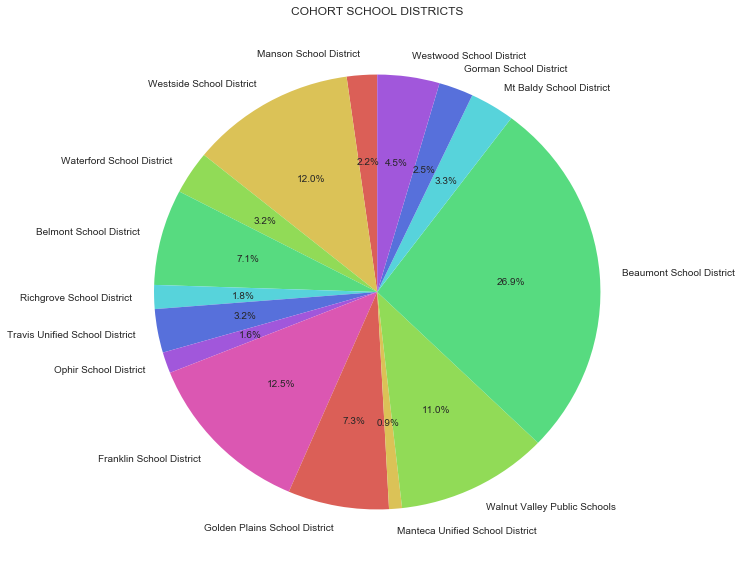

In [8]:
rcParams['figure.figsize'] = 10, 10

df_enroll_plt = df_enroll_cohort.groupby(['districtcode']).agg({'districtname':'first','researchid':'count'})

with sb.color_palette("hls", 8):
 _=plt.pie(df_enroll_plt['researchid'],labels=df_enroll_plt['districtname'],autopct='%1.1f%%', startangle=90)
plt.title('COHORT SCHOOL DISTRICTS')
plt.show()

> We are looking at the two related fields 'residentdistrictcode' & 'residentdistrictname'
> * We will also look at the list and frequency of changing from the resident district to another district

In [9]:
am_enroll_disc = df_enroll_cohort.groupby(['residentdistrictcode','residentdistrictname']).agg({'researchid':['count']})\
    .reset_index()
    
am_enroll_disc

,residentdistrictcode,residentdistrictname,researchid
,,,count
0,1109,Hueneme School District,1
1,1158,Lease School District,1
2,3017,Horicon School District,1
3,4019,Manson School District,1251
4,4127,Earlimart School District,13
5,4129,Lake Louise School District,1
6,4222,Campbell School Distric,19
7,4228,Cascade Union School District,12
8,4246,Westside School District,6503


In [10]:
#Here is a list of district transers
am_enroll_disc = df_enroll_cohort.groupby(['residentdistrictname','districtname'])\
                                          .agg({'researchid':['count']}).query('residentdistrictname != districtname')\
                                          .reset_index()
    
am_enroll_disc

,residentdistrictname,districtname,researchid
,,,count
0,Audrey School District,Franklin School District,1
1,Bethel School District,Franklin School District,278
2,Bonsall School District,Beaumont School District,5
3,Briggs School District,Beaumont School District,13
4,Campbell School Distric,Westside School District,19
5,Cascade Union School District,Westside School District,12
6,Central Limit School District,Belmont School District,5
7,Central Park School District,Franklin School District,109
8,Chewbacca School District,Manteca Unified School District,24


## School info and breakdowns

> We are looking at two related fields 'schoolcode' & 'schoolname'

In [11]:
am_enroll_disc = df_enroll_cohort.groupby(['schoolcode','schoolname']).agg({'researchid':['count']})\
    .reset_index()
am_enroll_disc

,schoolcode,schoolname,researchid
,,,count
0,2134,Globe High School,6815
1,2343,Ponderosa Senior High,1854
2,2478,Page Middle-Senior High School,1012
3,2553,Salame High School,3400
4,2580,Valley Union High School,1993
5,2623,Tombstone High School,709
6,2679,San Simon High School,1051
7,2706,Benson Middle-High School,892
8,2876,Mount Graham High School,3731


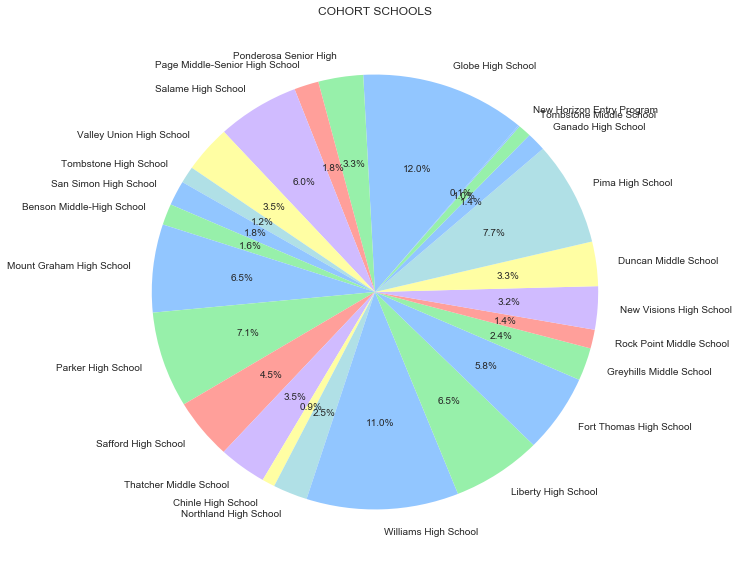

In [12]:
rcParams['figure.figsize'] = 10, 10

df_enroll_plt = df_enroll_cohort.groupby(['schoolcode']).agg({'schoolname':'first','researchid':'count'})

with sb.color_palette("pastel", 8):
 _=plt.pie(df_enroll_plt['researchid'],labels=df_enroll_plt['schoolname'],autopct='%1.1f%%', startangle=50)
plt.title('COHORT SCHOOLS')
plt.show()

> We will get some frequency counts from a number of the next few columns, those that seem to be connected will be grouped.

In [13]:
am_enroll_ct = df_enroll_cohort['sourcedataset'].value_counts().reset_index()
am_enroll_ct

,index,sourcedataset
0,STUDENTENROLLMENT2015_20160307,19316
1,STUDENTENROLLMENT2014_20160307,19272
2,STUDENTENROLLMENT2016_20161207,18438


In [14]:
#I have no idea what this field is
am_enroll_ct = df_enroll_cohort['locationid'].value_counts(sort=True).reset_index()
am_enroll_ct.head()

,index,locationid
0,403,6927
1,402,6815
2,413,6287
3,427,4397
4,430,4064


In [15]:
am_enroll_ct = df_enroll_cohort['primaryschoolflag'].value_counts()
am_enroll_ct

Y    56186
N      840
Name: primaryschoolflag, dtype: int64

In [16]:
am_enroll_ct = df_enroll_cohort['gender'].value_counts()
am_enroll_ct

M    29177
F    27849
Name: gender, dtype: int64

In [17]:
am_enroll_disc = df_enroll_cohort.groupby(['birthcountrycode','birthcountry']).agg({'researchid':['count']})\
    .reset_index()
am_enroll_disc['percentage'] = 100 * am_enroll_disc['researchid']  / am_enroll_disc['researchid'].sum()
am_enroll_disc.sort_values(by='percentage',ascending=False)
am_enroll_disc.head()

,birthcountrycode,birthcountry,researchid,percentage
,,,count,
0,,,3226,5.657069
1,AFG,AFGHANISTAN,13,0.022797
2,ARE,UNITED ARAB EMIRATES,3,0.005261
3,ARG,ARGENTINA,3,0.005261
4,ARM,ARMENIA,2,0.003507


In [18]:
wa_tup = [('Seattle Vicinity',980),('Seattle Main',981),('Everett',982),('Tacoma Vicinity',983),('Tacoma Main',984),
         ('Olympia',985),('Wenatchee',988),('Yakima',989),('Spokane Vicinity',990),('Spokane Distant',991),
          ('Spokane Main',992),('Pasco',993)]
wa_zip = pd.DataFrame(wa_tup,columns=['area','prefix'])

The zip code prefix information above comes from a Wikipedia article (https://en.wikipedia.org/wiki/List_of_ZIP_code_prefixes#Starts_with_9)<br>
In the data there are some zip codes outside of Washington State (which may be input errors), and some which are clearly input errors.  The number of these however is very small.

In [19]:
am_zip = df_enroll_cohort[['zipcode']]

am_zip = am_zip.assign(fivezip = am_zip['zipcode'].str[:5])
am_zip = am_zip.assign(prefix = am_zip['zipcode'].str[:3])

#am_zip = am_zip.groupby(['fivezip','prefix']).count().reset_index()
am_zip = am_zip.rename(columns={'zipcode': 'ninezip', 'fivezip': 'zipcode'})
am_zip['prefix'] = pd.to_numeric(am_zip['prefix'], errors='coerce', downcast='integer')
#am_zip

In [20]:
prefix_ct = am_zip['prefix'].value_counts(sort=True) #can add normalize=True for percentages, or dropna=False/Tru
#prefix_ct

In [21]:
m_zip = pd.merge(wa_zip, am_zip, how='inner', on='prefix')
am_by_prefix = m_zip.groupby(['prefix', 'area']).agg({'count'}).reset_index()
am_by_prefix = am_by_prefix.drop('ninezip',axis=1,level=0)
am_by_prefix['percentage'] = 100 * am_by_prefix['zipcode']  / am_by_prefix['zipcode'].sum()

am_by_prefix
#m_zip

,prefix,area,zipcode,percentage
,,,count,
0,980,Seattle Vicinity,57,0.100448
1,981,Seattle Main,9,0.015860
2,982,Everett,21250,37.447573
3,983,Tacoma Vicinity,4726,8.328340
4,984,Tacoma Main,6380,11.243083
5,985,Olympia,56,0.098685
6,988,Wenatchee,10768,18.975787
7,989,Yakima,3984,7.020759
8,990,Spokane Vicinity,845,1.489092


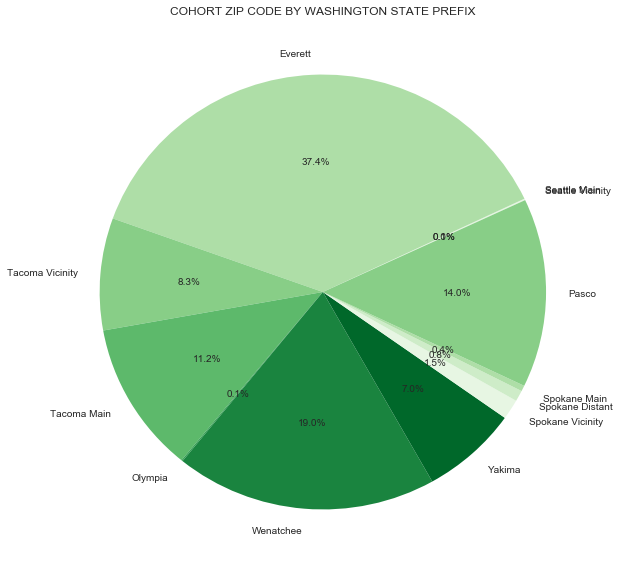

In [22]:
rcParams['figure.figsize'] = 10, 10

#df_enroll_plt = df_enroll_cohort.groupby(['district_id']).agg({'districtname':'first','researchid':'count'})

with sb.color_palette("Greens", 8):
 _=plt.pie(am_by_prefix['zipcode'],labels=am_by_prefix['area'],autopct='%1.1f%%', startangle=25)
plt.title('COHORT ZIP CODE BY WASHINGTON STATE PREFIX')
plt.show()